# 图像分类常用网络结构

In [1]:
import tensorflow as tf
input=tf.Variable(tf.random.normal([1,6,6,1]))
conv=tf.keras.layers.Conv2D(1,(2,2),strides=(1,1))(input)
print(conv)
pool=tf.keras.layers.MaxPool2D(2)(conv)
print(pool)

tf.Tensor(
[[[[-1.5488886 ]
   [-0.9490948 ]
   [-0.28051323]
   [-0.3329008 ]
   [-0.50197935]]

  [[ 0.14582264]
   [-0.47429168]
   [-0.09982029]
   [ 0.79977643]
   [ 2.2167752 ]]

  [[ 0.00659681]
   [-0.5042714 ]
   [-0.15211117]
   [-0.22589715]
   [-2.661767  ]]

  [[-0.00838095]
   [ 0.4916822 ]
   [ 0.09198448]
   [ 0.04821522]
   [ 0.19525516]]

  [[ 1.1322176 ]
   [ 0.28775144]
   [ 1.6907573 ]
   [-0.33382177]
   [-0.50872266]]]], shape=(1, 5, 5, 1), dtype=float32)
tf.Tensor(
[[[[0.14582264]
   [0.79977643]]

  [[0.4916822 ]
   [0.09198448]]]], shape=(1, 2, 2, 1), dtype=float32)


## AlexNet网络模型
    在2012年ImageNet大规模图像识别大赛上取得巨大成功。ImageNet使用图像为224*224像素，在该网络层的第一层使用11*11的卷积核，第二层使用5*5的卷积核，之后全采用3*3的卷积。每一层卷积之后 都用了RELU函数，第一、第二、第五个卷积后又使用了3*3的最大池化。第五个卷积后连接两个4096的全连接层，在每个全连接层再接上丢失概率为0.5的dropout层。

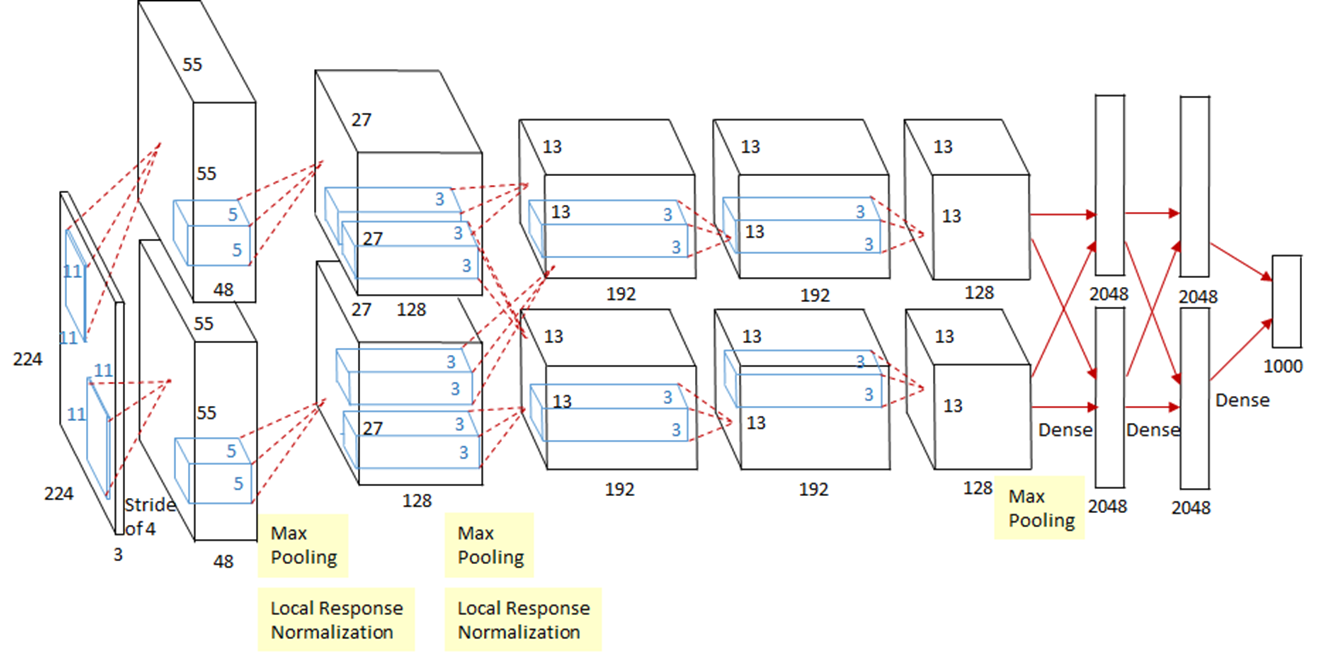

In [7]:
import tensorflow as tf #引入TensorFlow框架
from tensorflow import keras #引入keras
from tensorflow.keras import layers #引入Keras层结构
def mode1_alexnet():
    model=tf.keras.Sequential(name="AlexNet")
    #第一层卷积使用96个核函数，卷积核大小为11，步长为4，使用ReLU激活函数    
    model.add(layers.Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),name="conv1",input_shape=(224,224,3),activation="relu",padding="same")) # padding=same补零
    #第一个池化层使用的核大小为３、步长为２
    model.add(layers.MaxPooling2D((3,3),strides=2,name="pooling1"))
    #第二层卷积使用256个核函数，卷积核大小为5，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),name="conv2",activation="relu",padding="same"))
    #第二个池化层使用的核大小为3、步长为2
    model.add(layers.MaxPooling2D((3,3),strides=2,name="pooling2"))
    #第三层卷积使用256个核函数，卷积核大小为3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),name="conv3",activation="relu",padding="same"))
    #第四层卷积使用384个核函数，卷积核大小为3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),name="conv4",activation="relu",padding="same"))
    #第五层卷积使用256个核函数，卷积核大小为3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),name="conv5",activation="relu",padding="same"))
    #第三个池化层使用核大小为3，步长为2
    model.add(layers.MaxPooling2D((3,3),strides=2,name="pooling3"))
    #对前面提取的特征图操作进行展平操作，展开成一个二维的tensor
    model.add(layers.Flatten (name="flatten"))
    #输出节点为4096的全连接层操作
    model.add(layers.Dense(units=4096,activation=tf.nn.relu,name="fc1"))
    #为了防止过拟合，引入dropout操作，丢失概率为0.5
    model.add(layers.Dropout(rate=0.5))
    #输出节点为4096的全连接层操作
    model.add(layers.Dense(units=4096,activation=tf.nn.relu,name="fc2"))
    #为了防止过拟合，引入dropout操作，丢失概率为0.5
    model.add(layers.Dropout(rate=0.5))
    #最后进行类别数目的全连接
    model.add(layers.Dense(units=1000,name='fc3'))
    return model
if __name__=="__main__":
    y = mode1_alexnet()
    print(y.summary())
    keras.utils.plot_model(y,"./image/alexnet.png")


Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 56, 56, 96)        34944     
                                                                 
 pooling1 (MaxPooling2D)     (None, 27, 27, 96)        0         
                                                                 
 conv2 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 pooling2 (MaxPooling2D)     (None, 13, 13, 256)       0         
                                                                 
 conv3 (Conv2D)              (None, 13, 13, 256)       590080    
                                                                 
 conv4 (Conv2D)              (None, 13, 13, 384)       885120    
                                                                 
 conv5 (Conv2D)              (None, 13, 13, 256)       8849

## VGGNET
    是继AlexNet后的又一里程碑网络，将Alexnet网络中卷积层的概念上升到卷积集团的概念，即一个卷积集团可以有多个卷积层。VGGNET中有5个网络集团，其后再跟两个4096的全连接层以及一个1000维的分类结果输出层。
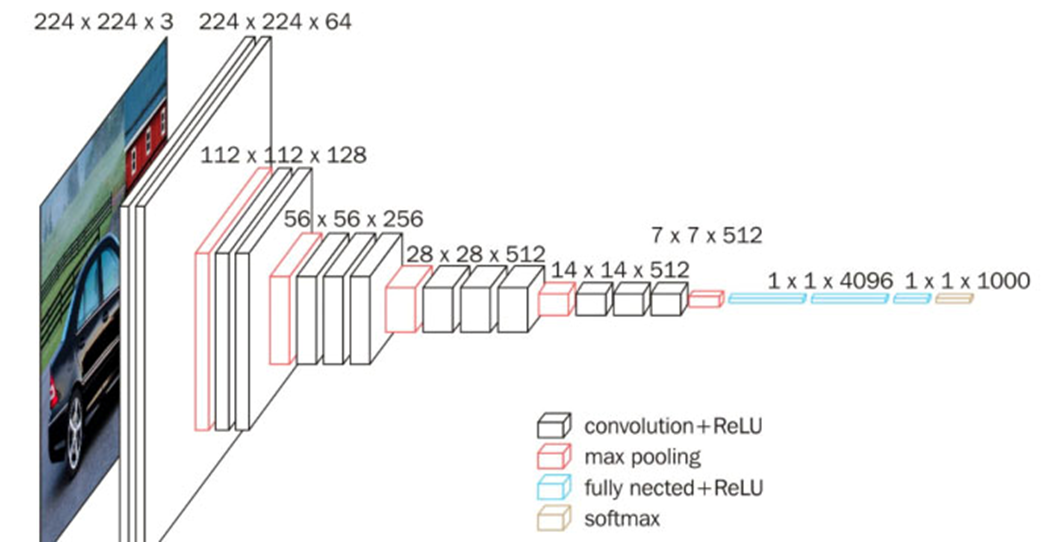

In [8]:
import tensorflow as tf #引入TensorFlow框架
from tensorflow import keras #引入keras
from tensorflow.keras import layers #引入Keras层结构
def mode1_alexnet():
    model = tf.keras.Sequential(name="VGG16Net")
    #第一组第一层卷积使用64个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=64,kernel_size=3,name="conv1_1",input_shape=(224,224,3),
                      activation="relu",padding="same"))
    #第一组第二层卷积使用64个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=64,kernel_size=3,name="conv1_2",
                      activation="relu",padding="same"))
    #第一组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool1'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第二组第一层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv2_1",
                      activation="relu",padding="same"))
    #第二组第二层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv2_2",
                      activation="relu",padding="same"))
    #第二组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool2'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第三组第一层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv3_1",
                      activation="relu",padding="same"))
    #第三组第二层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv3_2",
                      activation="relu",padding="same"))
    #第三组第三层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv3_3",
                      activation="relu",padding="same"))
    #第三组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool3'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第四组第一层卷积使用256个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=3,name="conv4_1",
                      activation="relu",padding="same"))
    #第四组第二层卷积使用256个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=3,name="conv4_2",
                      activation="relu",padding="same"))
    #第四组第三层卷积使用256个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=3,name="conv4_3",
                      activation="relu",padding="same"))
    #第四组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool4'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第五组第一层卷积使用512个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=512,kernel_size=3,name="conv5_1",
                      activation="relu",padding="same"))
    #第五组第二层卷积使用512个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=512,kernel_size=3,name="conv5_2",
                      activation="relu",padding="same"))
    #第五组第三层卷积使用512个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=512,kernel_size=3,name="conv5_3",
                      activation="relu",padding="same"))
    #第五组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool5'))
    # --------------------------------------------------------------------------------------------------------------------------
    #对前面提取的特征图操作进行展平操作
    model.add(layers.Flatten (name="flatten"))
    #输出节点为4096的全连接层操作
    model.add(layers.Dense (units=4096,activation="relu",name="fc1"))
    #为了防止过拟合，引入dropout操作，丢失概率为0.5
    model.add(layers.Dropout(rate=0.5))
    #输出节点为4096的全连接层操作
    model.add(layers.Dense (units=4096,activation=tf.nn.relu,name="fc2"))
    #为了防止过拟合，引入dropout操作，丢失概率为0.5
    model.add(layers.Dropout (rate=0.5))
    #最后进行类别数目的全连接
    model.add(layers.Dense(units=1000,name='fc3'))
    return model
if __name__=="__main__":
    y = mode1_alexnet()
    print(y.summary())
    keras.utils.plot_model(y,"./image/vgg16net.png")


Model: "VGG16Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0         
                                                                 
 conv3_1 (Conv2D)            (None, 56, 56, 128)       147

In [11]:
import tensorflow as tf #引入TensorFlow框架
from tensorflow import keras #引入keras
from tensorflow.keras import layers #引入Keras层结构
def mode1_alexnet():
    model = tf.keras.Sequential(name="VGG19Net")
    #第一组第一层卷积使用64个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=64,kernel_size=3,name="conv1_1",input_shape=(224,224,3),activation="relu",padding="same"))
    #第一组第二层卷积使用64个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=64,kernel_size=3,name="conv1_2",activation="relu",padding="same"))
    #第一组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool1'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第二组第一层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv2_1",activation="relu",padding="same"))
    #第二组第二层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv2_2",activation="relu",padding="same"))
    #第二组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool2'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第三组第一层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv3_1",activation="relu",padding="same"))
    #第三组第二层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv3_2",activation="relu",padding="same"))
    #第三组第三层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv3_3",activation="relu",padding="same"))
    #第三组第四层卷积使用128个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=128,kernel_size=3,name="conv3_4",activation="relu",padding="same"))
    #第三组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool3'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第四组第一层卷积使用256个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=3,name="conv4_1",activation="relu",padding="same"))
    #第四组第二层卷积使用256个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=3,name="conv4_2",activation="relu",padding="same"))
    #第四组第三层卷积使用256个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=3,name="conv4_3",activation="relu",padding="same"))
    #第四组第四层卷积使用256个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=256,kernel_size=3,name="conv4_4",activation="relu",padding="same"))
    #第四组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool4'))
    # --------------------------------------------------------------------------------------------------------------------------
    #第五组第一层卷积使用512个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=512,kernel_size=3,name="conv5_1",activation="relu",padding="same"))
    #第五组第二层卷积使用512个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=512,kernel_size=3,name="conv5_2",activation="relu",padding="same"))
    #第五组第三层卷积使用512个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=512,kernel_size=3,name="conv5_3",activation="relu",padding="same"))
    #第五组第四层卷积使用512个核函数，卷积核大小为 3，步长为1，使用ReLU激活函数
    model.add(layers.Conv2D(filters=512,kernel_size=3,name="conv5_4",activation="relu",padding="same"))
    #第五组池化层使用的核大小为2、步长为２
    model.add(layers.MaxPooling2D ((2, 2),strides=2, name='pool5'))
    #对前面提取的特征图操作进行展平操作
    model.add(layers.Flatten (name="flatten"))
    #输出节点为4096的全连接层操作
    model.add(layers.Dense (units=4096,activation="relu",name="fc1"))
    #为了防止过拟合，引入dropout操作，丢失概率为0.5
    model.add(layers.Dropout(rate=0.5))
    #输出节点为4096的全连接层操作
    model.add(layers.Dense (units=4096,activation=tf.nn.relu,name="fc2"))
    #为了防止过拟合，引入dropout操作，丢失概率为0.5
    model.add(layers.Dropout (rate=0.5))
    #最后进行类别数目的全连接
    model.add(layers.Dense(units=1000,name='fc3'))
    return model
if __name__=="__main__":
    y = mode1_alexnet()
    print(y.summary())
    keras.utils.plot_model(y,"./image/vgg19net.png")


Model: "VGG19Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0         
                                                                 
 conv3_1 (Conv2D)            (None, 56, 56, 128)       147